In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

import sklearn.ensemble as se
import sklearn.model_selection as ms
import sklearn.metrics as sm
import sklearn.preprocessing as sp
import sklearn.impute as si
import seaborn as sns

import math

In [2]:
#load the raw dataset
rawdata = pd.read_excel('AQY data.xlsx')
rawdata.describe(include='all')

,Reference,Number,DOM Category,Wavelength Range,Φ3DOM*(10-2),Φ1O2(10-2),Φ·OH(10-4),pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX
count,1329.000000,1329.000000,1329,1329,1063.000000,793.000000,499.000000,1228.000000,1329.000000,1313.000000,1323.000000,836.000000,681.000000,677.000000
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NOM,290-400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,763,721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,21.072235,680.372460,NaN,NaN,3.429695,3.448188,0.801934,7.507093,8.650689,6.351162,6.206003,1.635746,0.843352,0.686835
std,14.524000,391.259546,NaN,NaN,3.050921,2.521926,1.504777,0.882760,8.806242,3.868692,2.879921,0.315743,0.104805,0.202008
min,1.000000,2.000000,NaN,NaN,0.020900,0.230000,0.013000,3.000000,0.430000,0.119526,1.685400,0.590000,0.240000,0.080000
25%,8.000000,343.000000,NaN,NaN,1.400000,1.670000,0.141000,7.000000,4.260000,3.803304,4.600000,1.478500,0.783000,0.580000
50%,16.000000,675.000000,NaN,NaN,2.680000,2.700000,0.320000,7.700000,6.350000,5.700000,5.510000,1.580000,0.875000,0.680000
75%,32.000000,1009.000000,NaN,NaN,4.700000,4.520000,0.709000,8.072500,10.000000,8.041727,6.800000,1.690000,0.910000,0.818000


In [3]:
#Counts of each category in the categorical feature 
display(rawdata['DOM Category'].value_counts())
display(rawdata['Wavelength Range'].value_counts())
#Pivot tables of each catergoy in the categorical feature
display(rawdata.iloc[:,2:].pivot_table(index='DOM Category'))
display(rawdata.iloc[:,2:].pivot_table(index='Wavelength Range'))

NOM        763
Isolate    447
EfOM       119
Name: DOM Category, dtype: int64

290-400    721
290-600    347
UVA        261
Name: Wavelength Range, dtype: int64

,BIX,DOC,E2/E3,FIX,HIX,SUVA254,pH,Φ1O2(10-2),Φ3DOM*(10-2),Φ·OH(10-4)
DOM Category,,,,,,,,,,
EfOM,0.923049,8.455445,5.555630,2.102667,0.753049,4.817750,7.941604,3.122807,2.937975,1.099125
Isolate,0.677045,6.491533,5.599586,1.649482,0.754142,7.180062,7.071339,3.715971,2.781465,0.797475
NOM,0.652463,9.946072,6.660716,1.563086,0.865983,6.119313,7.714093,3.232244,3.750861,0.788442


,BIX,DOC,E2/E3,FIX,HIX,SUVA254,pH,Φ1O2(10-2),Φ3DOM*(10-2),Φ·OH(10-4)
Wavelength Range,,,,,,,,,,
290-400,0.686584,10.334060,6.592224,1.616012,0.846042,6.628917,7.626062,4.837027,4.330158,1.079938
290-600,0.643835,6.997032,5.011536,1.751907,0.842258,5.750727,7.369738,2.515816,2.523275,0.444508
UVA,1.094591,6.199000,6.699671,1.463333,0.593396,6.379054,7.351564,2.333517,1.971558,0.887269


In [4]:
#Missing value of each feature and target
rawdata.iloc[:,4:].isnull().sum()

Φ3DOM*(10-2)    266
Φ1O2(10-2)      536
Φ·OH(10-4)      830
pH              101
DOC               0
SUVA254          16
E2/E3             6
FIX             493
HIX             648
BIX             652
dtype: int64

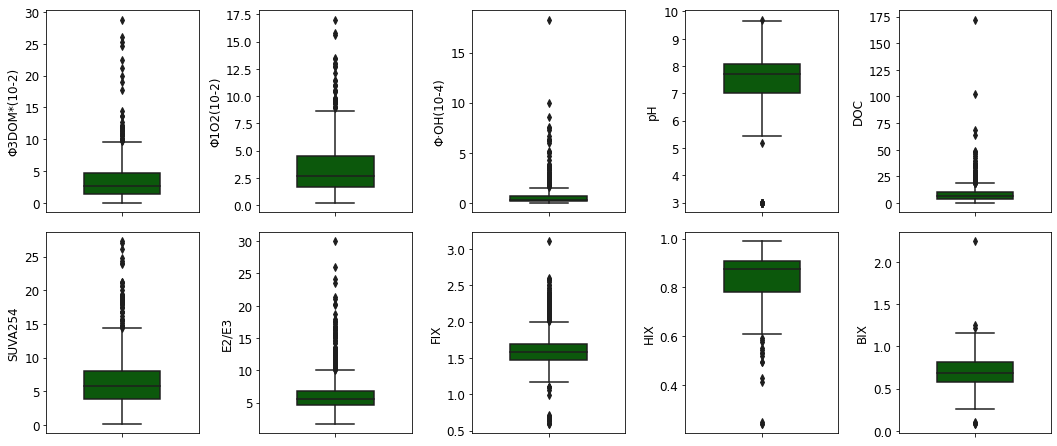

In [5]:
#Boxplot 
a=0
fig = plt.figure(figsize=(18,20))
for i in range(10):
    axes = fig.add_subplot(5,5,a+1)
    axes = sns.boxplot(y=rawdata.iloc[:,4+i],orient="v",color="darkgreen",width=0.5)
    axes.tick_params(labelsize=12)
    axes.set_ylabel(rawdata.columns[4+i],size=12)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)
    a=a+1

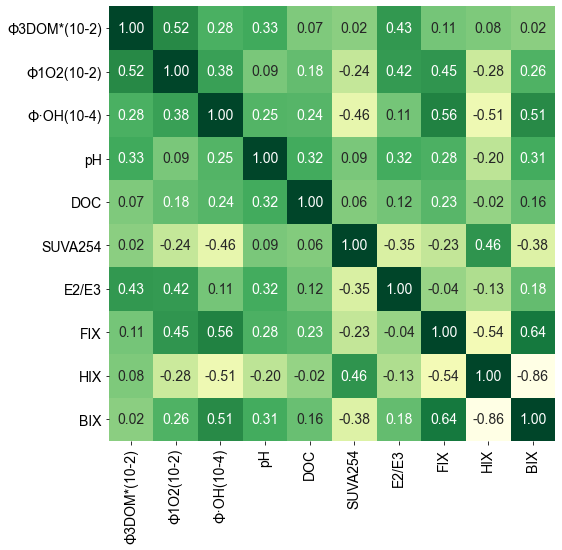

In [6]:
#Correlation heatmap
plt.figure(figsize=(8,8))
h = sns.heatmap(rawdata.iloc[:,3:].corr(method="spearman"), vmax=1, vmin=-0.8,
            cmap='YlGn',cbar=False,
            annot=True, fmt='.2f', annot_kws={'size':14, 'fontname':'Arial'})
plt.xticks(rotation = 90, fontsize= 14, fontname = "Arial")
plt.yticks(rotation = 0, fontsize= 14, fontname = "Arial")
plt.show()

In [7]:
#Extract the feature for the following missing value imputation
df = rawdata.iloc[:,7:]
df.describe()

,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX
count,1228.000000,1329.000000,1313.000000,1323.000000,836.000000,681.000000,677.000000
mean,7.507093,8.650689,6.351162,6.206003,1.635746,0.843352,0.686835
std,0.882760,8.806242,3.868692,2.879921,0.315743,0.104805,0.202008
min,3.000000,0.430000,0.119526,1.685400,0.590000,0.240000,0.080000
25%,7.000000,4.260000,3.803304,4.600000,1.478500,0.783000,0.580000
50%,7.700000,6.350000,5.700000,5.510000,1.580000,0.875000,0.680000
75%,8.072500,10.000000,8.041727,6.800000,1.690000,0.910000,0.818000
max,9.700000,172.200000,27.313580,30.000000,3.110000,0.990000,2.250000


## Missforest imputation

In [8]:
train_idx = []
test_idx = []
df_iter = []
gamma = []
impute_df = []
for b in range(len(df.columns)):
    #Extract the index of the missing value and non-missing value
    train_idx.append(df.iloc[:,b].index[np.where(df.iloc[:,b].notnull())[0]])
    test_idx.append(df.iloc[:,b].index[np.where(df.iloc[:,b].isnull())[0]])

sortindex = np.argsort(df.isnull().sum(axis=0)).values
df_miss = df
#Initialize the stopping criterion
gp=[1,1,1,1,1,1,1]
#Set the iterations 
for a in range(5):
    print("iterations:{}".format(a))
    #In the first imputation, the dataset is imputed by the mean values
    if a < 1:
        df_z = si.SimpleImputer(missing_values = np.nan, strategy='mean').fit_transform(df_miss)
        df_z = pd.DataFrame(df_z, columns = df_miss.columns)
    #After the first imputation, the dataset is replaced by the former imputed dataset  
    else:
        df_z = df_miss.copy()
    
    for i in np.delete(sortindex,0):
        fillc = df_z.iloc[:,i]
        df_new = df_z.iloc[:,df_z.columns != df_z.columns[i]]     
        #Split the dataset
        Ytrain = fillc[train_idx[i]]
        Ytest = fillc[test_idx[i]]
        Xtrain = df_new.loc[train_idx[i],:]
        Xtest = df_new.loc[test_idx[i],:]    
        #Apply the random forest with defualt hyperparameters to impute the missing values
        rfr_impute = se.RandomForestRegressor(random_state=42,oob_score=True)
        rfr_impute = rfr_impute.fit(Xtrain, Ytrain)  
        #Apply cross-validation to explore the imputation performance 
        cv = ms.KFold(n_splits=5, shuffle=True, random_state=42)
        scores = ms.cross_val_score(rfr_impute, Xtrain, Ytrain , cv=cv, scoring='r2')
        cv_R2 = np.mean(scores)
        #Impute
        Ypredict = rfr_impute.predict(Xtest)
        impute_df.append(Ypredict)
        #The imputed feature is filled in the raw dataset
        df_z.loc[test_idx[i],df_z.columns[i]]=Ypredict 
        print(df_miss.columns[i])
        print("Train R2: %.4f" %(rfr_impute.score(Xtrain,Ytrain)))  
        print("CV R2: %.4f (+/- %.4f)" %(cv_R2, scores.std())) 
        print("Oob score: %.4f" %(rfr_impute.oob_score_)) 
        
    #Examine the change of the stopping criterion after imputation
    if a < 1:
        yita = sum(np.array((df_z - df_miss.fillna(value=0))**2))/ sum((np.array(df_z)**2))
    else:
        yita = sum(np.array((df_z - df_miss)**2))/ sum((np.array(df_z)**2))
    print(yita)

    if ((yita - gp) >  0).any():
        break
    gp = yita 
    gamma.append(yita)
    df_iter.append(df_z)
    df_miss = df_z
print("The iteration is converged in:{}".format(a-1))

iterations:0
E2/E3
Train R2: 0.9512
CV R2: 0.6271 (+/- 0.0671)
Oob score: 0.6609
SUVA254
Train R2: 0.9444
CV R2: 0.6063 (+/- 0.1203)
Oob score: 0.6026
pH
Train R2: 0.9081
CV R2: 0.4044 (+/- 0.0579)
Oob score: 0.3957
FIX
Train R2: 0.9707
CV R2: 0.7495 (+/- 0.0855)
Oob score: 0.7821
HIX
Train R2: 0.9713
CV R2: 0.7866 (+/- 0.0190)
Oob score: 0.7955
BIX
Train R2: 0.9762
CV R2: 0.8201 (+/- 0.0545)
Oob score: 0.8302
[0.07024782 0.         0.01675626 0.00349037 0.35348555 0.45909634
 0.51032184]
iterations:1
E2/E3
Train R2: 0.9563
CV R2: 0.6448 (+/- 0.0486)
Oob score: 0.6588
SUVA254
Train R2: 0.9707
CV R2: 0.7789 (+/- 0.0642)
Oob score: 0.7899
pH
Train R2: 0.9501
CV R2: 0.6393 (+/- 0.0741)
Oob score: 0.6550
FIX
Train R2: 0.9749
CV R2: 0.8040 (+/- 0.0349)
Oob score: 0.8170
HIX
Train R2: 0.9726
CV R2: 0.7966 (+/- 0.0130)
Oob score: 0.8040
BIX
Train R2: 0.9768
CV R2: 0.8180 (+/- 0.0595)
Oob score: 0.8296
[0.00088705 0.         0.00017772 0.00014315 0.00228672 0.00100098
 0.00487711]
iterations:2

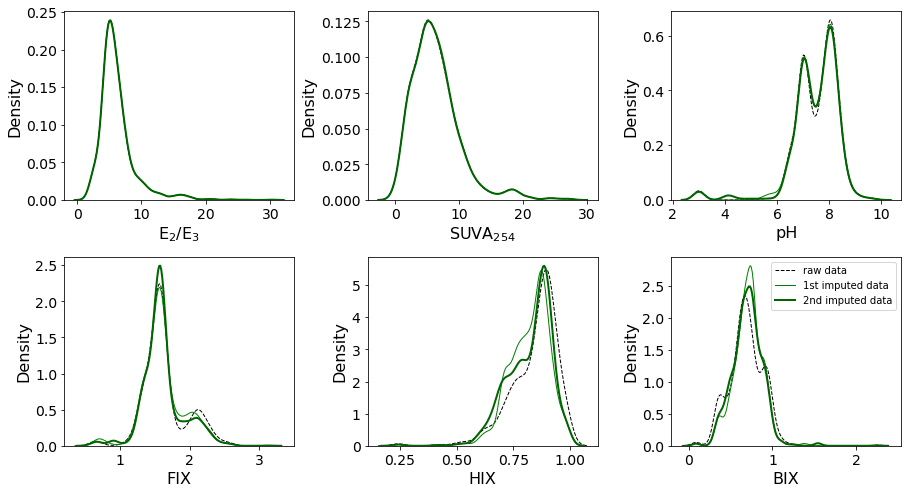

In [9]:
#Plot the change of data distribution after each imputation
a=0
implabel=[ 'pH', 'DOC', '$\mathrm{SUVA_{%d}}$' % (254), '$\mathrm{E_%d/E_%d}$' % (2,3), 'FIX', 'HIX','BIX']
fig = plt.figure(figsize=(15,8))
for i in np.delete(sortindex,0):
    axes = fig.add_subplot(2,3,a+1)
    axes = sns.kdeplot(df.iloc[:,i],color='black',linewidth=1, linestyle='--')
    axes = sns.kdeplot(df_iter[0].iloc[:,i],color='green',linewidth=1)
    axes = sns.kdeplot(df_iter[1].iloc[:,i],color='darkgreen',linewidth=2)
    axes.tick_params(labelsize=14)
    axes.set_xlabel(implabel[i],size=16) 
    axes.set_ylabel('Density',size=16)
    plt.subplots_adjust(wspace=0.32, hspace=0.3)
    a=a+1
plt.legend(['raw data','1st imputed data', '2nd imputed data'],fontsize=10)

In [10]:
#Based on the iterative imputation, the data with second imputation is extracted 
df_iter[1].describe()

,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,7.469506,8.650689,6.374037,6.209635,1.610804,0.822692,0.699812
std,0.927645,8.806242,3.857318,2.874673,0.292497,0.097619,0.182165
min,3.000000,0.430000,0.119526,1.685400,0.590000,0.240000,0.080000
25%,7.000000,4.260000,3.830000,4.600000,1.470000,0.760000,0.599000
50%,7.655600,6.350000,5.757500,5.513800,1.576000,0.851000,0.709000
75%,8.060000,10.000000,8.041727,6.900000,1.673110,0.892590,0.809139
max,9.700000,172.200000,27.313580,30.000000,3.110000,0.990000,2.250000


In [11]:
#One hot encoding for the categorical feature
#Extract the categorical feature
cat_columns = rawdata.iloc[:,2:4]
ohe = sp.OneHotEncoder()
tran_cat_columns = ohe.fit_transform(cat_columns).toarray()
col_name = ohe.get_feature_names(input_features=['DC','WR'])
cat_df = pd.DataFrame(tran_cat_columns, columns=col_name)
cat_df

,DC_EfOM,DC_Isolate,DC_NOM,WR_290-400,WR_290-600,WR_UVA
0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...
1324,0.0,0.0,1.0,1.0,0.0,0.0
1325,0.0,0.0,1.0,1.0,0.0,0.0
1326,0.0,0.0,1.0,1.0,0.0,0.0
1327,0.0,0.0,1.0,1.0,0.0,0.0


In [12]:
#Preprocessed data
new_df = pd.concat([rawdata['Reference'],cat_df,df_iter[1],rawdata.iloc[:,4:7]], axis=1)
display(new_df.describe(include='all'))
display(new_df.head(10))

,Reference,DC_EfOM,DC_Isolate,DC_NOM,WR_290-400,WR_290-600,WR_UVA,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX,Φ3DOM*(10-2),Φ1O2(10-2),Φ·OH(10-4)
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1063.000000,793.000000,499.000000
mean,21.072235,0.089541,0.336343,0.574116,0.542513,0.261099,0.196388,7.469506,8.650689,6.374037,6.209635,1.610804,0.822692,0.699812,3.429695,3.448188,0.801934
std,14.524000,0.285631,0.472636,0.494662,0.498377,0.439399,0.397415,0.927645,8.806242,3.857318,2.874673,0.292497,0.097619,0.182165,3.050921,2.521926,1.504777
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.430000,0.119526,1.685400,0.590000,0.240000,0.080000,0.020900,0.230000,0.013000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.260000,3.830000,4.600000,1.470000,0.760000,0.599000,1.400000,1.670000,0.141000
50%,16.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,7.655600,6.350000,5.757500,5.513800,1.576000,0.851000,0.709000,2.680000,2.700000,0.320000
75%,32.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.060000,10.000000,8.041727,6.900000,1.673110,0.892590,0.809139,4.700000,4.520000,0.709000
max,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.700000,172.200000,27.313580,30.000000,3.110000,0.990000,2.250000,28.814730,17.020000,18.300000


,Reference,DC_EfOM,DC_Isolate,DC_NOM,WR_290-400,WR_290-600,WR_UVA,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX,Φ3DOM*(10-2),Φ1O2(10-2),Φ·OH(10-4)
0,1,0.0,0.0,1.0,0.0,0.0,1.0,8.1,5.81,5.191858,11.10,1.58292,0.871740,0.69550,2.08,1.05,0.235
1,1,0.0,0.0,1.0,0.0,0.0,1.0,7.7,6.90,4.882360,9.20,1.55917,0.860790,0.71691,1.21,0.69,0.101
2,1,0.0,0.0,1.0,0.0,0.0,1.0,7.9,5.52,4.290172,11.30,1.59148,0.860080,0.71870,1.54,0.98,0.040
3,1,0.0,0.0,1.0,0.0,0.0,1.0,6.4,3.25,5.027626,5.50,1.47444,0.871980,0.50710,0.48,0.58,0.142
4,1,0.0,0.0,1.0,0.0,0.0,1.0,6.9,0.59,8.439129,4.60,1.30198,0.874330,0.42741,0.67,0.69,0.091
5,2,0.0,1.0,0.0,0.0,0.0,1.0,8.0,2.00,7.645960,4.74,1.59660,0.861100,0.68660,2.55,1.90,NaN
6,2,0.0,1.0,0.0,0.0,0.0,1.0,8.0,2.00,6.125980,5.86,1.64186,0.902820,0.67362,5.29,3.30,NaN
7,2,0.0,1.0,0.0,0.0,0.0,1.0,8.0,2.00,5.458110,5.31,1.62478,0.885640,0.66546,3.29,2.30,NaN
8,2,0.0,1.0,0.0,0.0,0.0,1.0,8.0,2.00,7.784140,4.58,1.57407,0.840070,0.70306,1.76,1.67,NaN
9,2,0.0,1.0,0.0,0.0,0.0,1.0,8.0,2.00,11.791360,3.79,1.57954,0.795349,0.78197,1.12,1.20,NaN


In [13]:
#Export the preprocessed data
new_df.to_excel('Preprocessed AQY data.xlsx')